In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

In [318]:
df = pd.read_csv("nba_player_stats.csv")

In [319]:
df.columns

Index(['Season', 'Player Name', 'Position', 'Age', 'Team', 'Games Played',
       'Field Goals Made', 'Field Goals Attempted', 'Field Goal Percentage',
       '2-Point Field Goals Made', '2-Point Field Goals Attempted',
       '2-Point Percentage', 'Effective Field Goal Percentage',
       'Free Throws Made', 'Free Throws Attempted', 'Free Throw Percentage',
       'Assists', 'Personal Fouls', 'Total Points'],
      dtype='object')

In [320]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Season,28237.0,1995.945178,18.768932,1950.0,1983.000,1999.000,2012.000,2022.0
Age,28237.0,26.582640,3.879153,18.0,24.000,26.000,29.000,44.0
Games Played,28237.0,49.361334,26.596530,1.0,25.000,55.000,74.000,88.0
Field Goals Made,28237.0,189.180579,184.847954,0.0,38.000,134.000,288.000,1597.0
Field Goals Attempted,28237.0,416.647130,391.122582,0.0,92.000,304.000,639.000,3159.0
Field Goal Percentage,28108.0,0.431712,0.099321,0.0,0.392,0.438,0.481,1.0
2-Point Field Goals Made,28237.0,168.832914,174.734734,0.0,31.000,111.000,253.000,1597.0
2-Point Field Goals Attempted,28237.0,358.756808,360.944893,0.0,72.000,244.000,542.000,3159.0
2-Point Percentage,28035.0,0.452002,0.106212,0.0,0.411,0.461,0.501,1.0
Effective Field Goal Percentage,28108.0,0.456828,0.104355,0.0,0.418,0.469,0.509,1.5


In [321]:
# sort by the player and the season
df = df.sort_values(by=["Player Name", "Season"])

In [322]:
# per game statistics
df["Points_Per_Game"] = df["Total Points"] / df["Games Played"]
df["Assists_Per_Game"] = df["Assists"] / df["Games Played"]
df["Field_Goals_Per_Game"] = df["Field Goals Made"] / df["Games Played"]

In [323]:
# over year changes
df["FG_Percentage_Change"] = df.groupby("Player Name")["Field Goal Percentage"].diff().fillna(0)
df["Points_Per_Game_Change"] = df.groupby("Player Name")["Points_Per_Game"].diff().fillna(0)
df["Assists_Per_Game_Change"] = df.groupby("Player Name")["Assists_Per_Game"].diff().fillna(0)
df["Games_Played_Change"] = df.groupby("Player Name")["Games Played"].diff().fillna(0)


In [324]:
df.columns

Index(['Season', 'Player Name', 'Position', 'Age', 'Team', 'Games Played',
       'Field Goals Made', 'Field Goals Attempted', 'Field Goal Percentage',
       '2-Point Field Goals Made', '2-Point Field Goals Attempted',
       '2-Point Percentage', 'Effective Field Goal Percentage',
       'Free Throws Made', 'Free Throws Attempted', 'Free Throw Percentage',
       'Assists', 'Personal Fouls', 'Total Points', 'Points_Per_Game',
       'Assists_Per_Game', 'Field_Goals_Per_Game', 'FG_Percentage_Change',
       'Points_Per_Game_Change', 'Assists_Per_Game_Change',
       'Games_Played_Change'],
      dtype='object')

In [325]:
features = df[["Age", "Games Played", "Field Goal Percentage","Points_Per_Game","Assists_Per_Game","Points_Per_Game_Change", "FG_Percentage_Change","Assists_Per_Game_Change"]].values

features = np.nan_to_num(features)


In [326]:
features

array([[ 2.20000000e+01,  8.20000000e+01,  5.39000000e-01, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.30000000e+01,  7.90000000e+01,  5.38000000e-01, ...,
         4.43115159e+00, -1.00000000e-03,  4.04754554e-01],
       [ 2.40000000e+01,  8.20000000e+01,  5.03000000e-01, ...,
         6.42019142e-01, -3.50000000e-02,  7.08552022e-02],
       ...,
       [ 3.10000000e+01,  3.00000000e+00,  5.22000000e-01, ...,
         5.19047619e+00,  1.15000000e-01,  4.76190476e-01],
       [ 3.20000000e+01,  5.80000000e+01,  5.68000000e-01, ...,
        -2.48850575e+00,  4.60000000e-02, -2.18390805e-01],
       [ 3.30000000e+01,  2.90000000e+01,  5.42000000e-01, ...,
        -1.18965517e+00, -2.60000000e-02, -1.37931034e-01]],
      shape=(28237, 8))

In [327]:
# standardize our features
scaler = StandardScaler()
features = scaler.fit_transform(features)


In [328]:
X_train, X_test = train_test_split(features, test_size=0.2, random_state=69)

# 3 states: rookie, bench, all star
model = hmm.GaussianHMM(n_components=3, covariance_type="full",  n_iter=200, random_state=69) # 69 as a random value

model.fit(X_train)

GaussianHMM(covariance_type='full', n_components=3, n_iter=200, random_state=69)

In [329]:
# predictions
df["Hidden_State"] = model.predict(features)

In [330]:
print("Transition Matrix")
print(model.transmat_)

Transition Matrix
[[0.3904543  0.46570439 0.14384131]
 [0.38013386 0.46778005 0.15208609]
 [0.3731202  0.46722535 0.15965446]]


In [331]:
print("State Means")
print(model.means_)

State Means
[[-0.21812984 -0.06913589  0.01932933 -0.48808265 -0.57815073 -0.00224134
   0.00151891  0.00311631]
 [ 0.16494099  0.44550965  0.15473611  0.67210114  0.66019246  0.03225551
   0.01961     0.02981632]
 [ 0.05062443 -1.22305443 -0.54453092 -0.876695   -0.61127905 -0.09789558
  -0.0534269  -0.10488146]]


In [332]:
print("Model Log-Likelihood on Test Set:", model.score(X_test))

Model Log-Likelihood on Test Set: -48801.53676426046


In [333]:
test_predictions = model.predict(X_test)
train_predictions = model.predict(X_train)

In [334]:
accuracy = accuracy_score(train_predictions[:len(test_predictions)], test_predictions)
accuracy

0.3953611898016997

In [335]:
# distribution of states
state_counts = pd.Series(df["Hidden_State"]).value_counts().sort_index()
print("State Distribution")
print(state_counts)

State Distribution
Hidden_State
0    11176
1    13077
2     3984
Name: count, dtype: int64


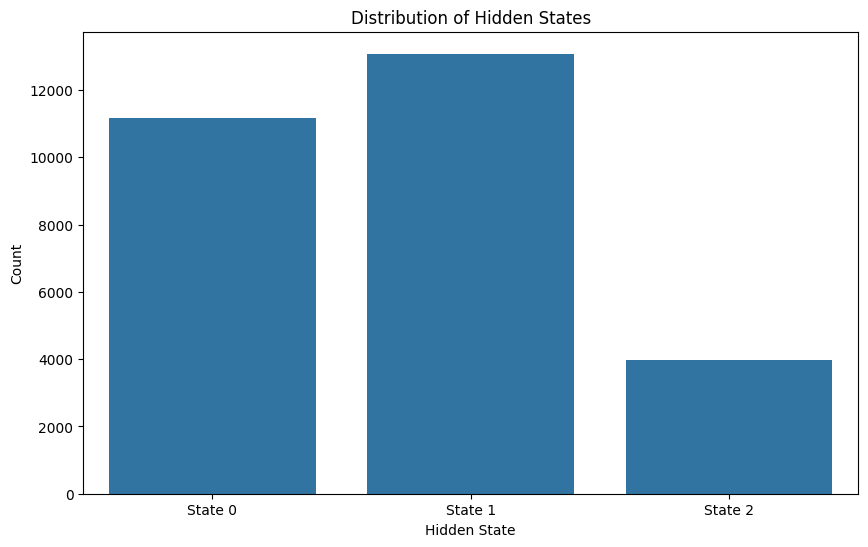

<Figure size 640x480 with 0 Axes>

In [336]:
# Visualize the distribution of states
plt.figure(figsize=(10, 6))
sns.countplot(x=df["Hidden_State"])
plt.title("Distribution of Hidden States")
plt.xlabel("Hidden State")
plt.ylabel("Count")
plt.xticks([0, 1, 2], ["State 0", "State 1", "State 2"])

plt.show()
plt.savefig("state_distribution.png")


In [337]:
# characteristics of each state
state_analysis = df.groupby("Hidden_State").agg({"Age": "mean","Points_Per_Game": "mean", "Assists_Per_Game": "mean", "Field Goal Percentage": "mean", "Games Played": "mean"}).round(2)

print("state characteristics")
print(state_analysis)

state characteristics
                Age  Points_Per_Game  Assists_Per_Game  Field Goal Percentage  \
Hidden_State                                                                    
0             25.75             5.27              0.84                   0.43   
1             27.25            12.51              3.11                   0.45   
2             26.72             2.93              0.79                   0.38   

              Games Played  
Hidden_State                
0                    47.36  
1                    61.34  
2                    15.63  


In [338]:
# mapping states to career changes
state_labels = ["Unknown", "Unknown", "Unknown"]
youngest_state = state_analysis["Age"].idxmin()
oldest_state = state_analysis["Age"].idxmax()
middle_state = 3 - youngest_state - oldest_state  

# states are 0, 1, 2

state_labels[youngest_state] = "Starter"
state_labels[oldest_state] = "Bench"
state_labels[middle_state] = "All Star"


In [339]:
print("State Mapping:")
for i, label in enumerate(state_labels):
    print(f"State {i} -> {label}")


State Mapping:
State 0 -> Starter
State 1 -> Bench
State 2 -> All Star


In [340]:

state_mapping = {i: label for i, label in enumerate(state_labels)}


def plot_player_career(player_name):
    player_data = df[df["Player Name"] == player_name]
    if len(player_data) < 3: 
        return
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.plot(player_data["Season"], player_data["Hidden_State"], marker="o", linestyle="-", color="black")
    plt.xlabel("Season")
    plt.ylabel("Hidden State")
    plt.title(f"Career Trajectory for {player_name}")
    plt.yticks([0, 1, 2], [state_mapping[0], state_mapping[1], state_mapping[2]])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    plt.subplot(2, 1, 2)
    plt.plot(player_data["Season"], player_data["Points_Per_Game"], marker="o", label="Points/Game")
    plt.plot(player_data["Season"], player_data["Field Goal Percentage"] * 100, marker="s", label="FG%")
    plt.xlabel("Season")
    plt.ylabel("Value")
    plt.title(f"Key Statistics for {player_name}")
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f"career_trajectory_{player_name.replace(' ', '_')}.png")
  
    plt.show()



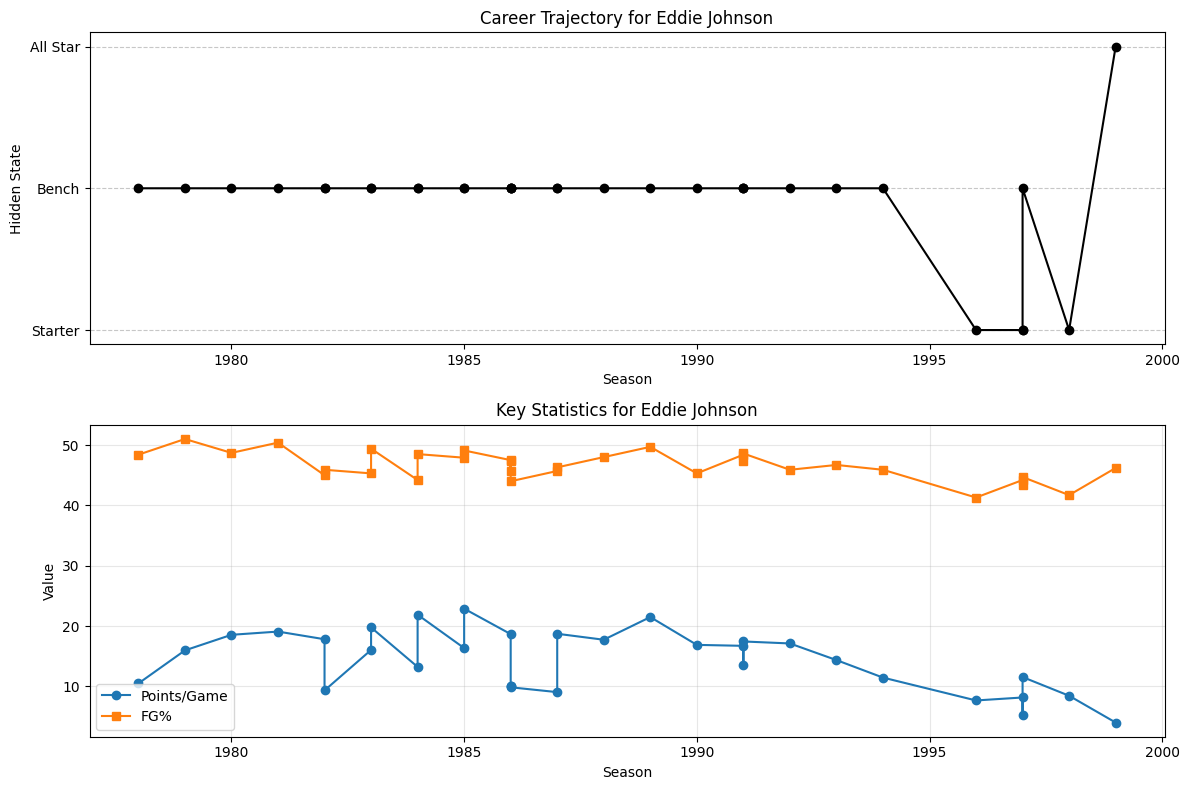

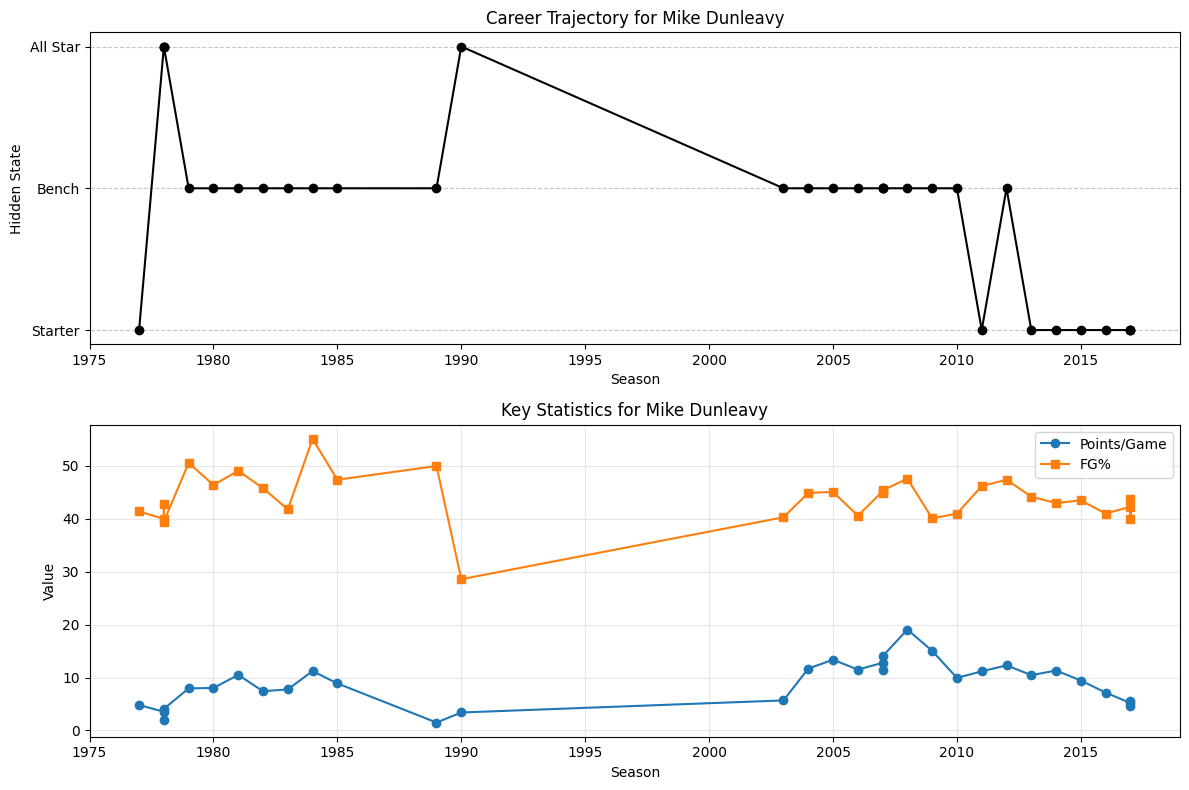

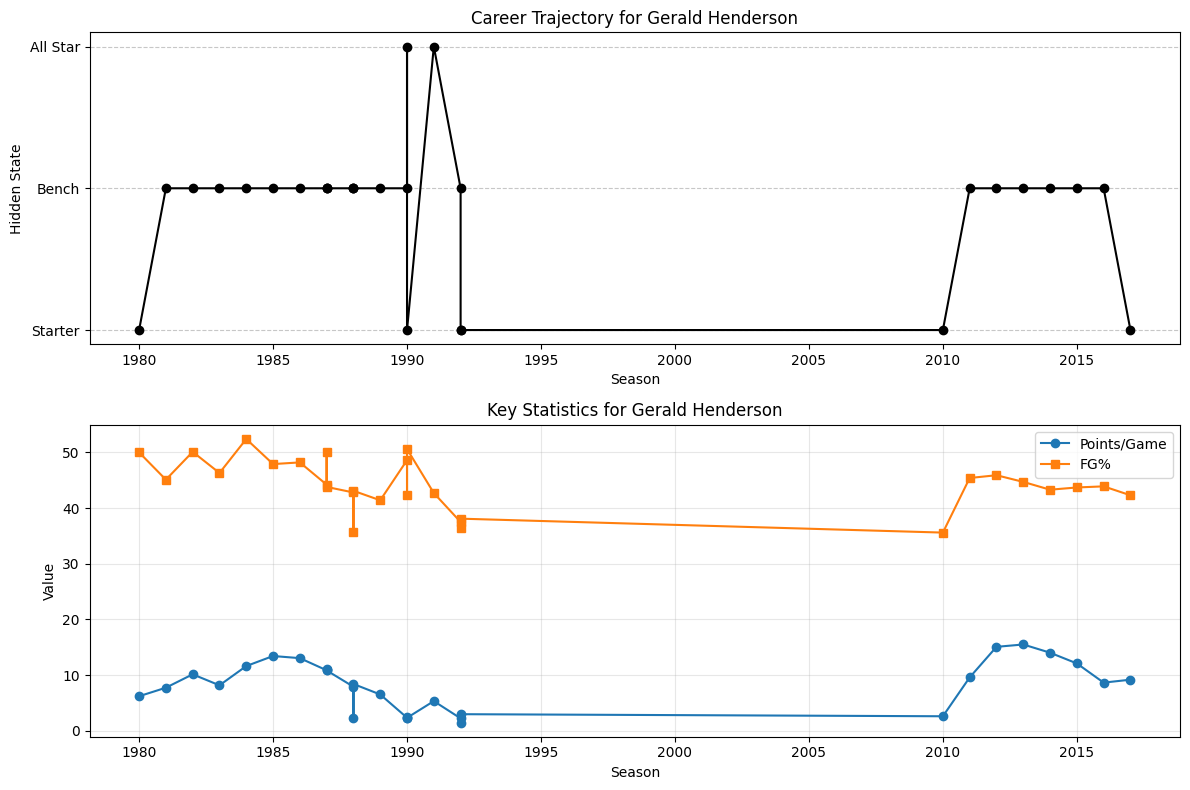

In [341]:
# list of players with long careers
long_career_players = df["Player Name"].value_counts()[df["Player Name"].value_counts() > 10].index.tolist()
if long_career_players:

    for player in long_career_players[:3]: 
        plot_player_career(player)


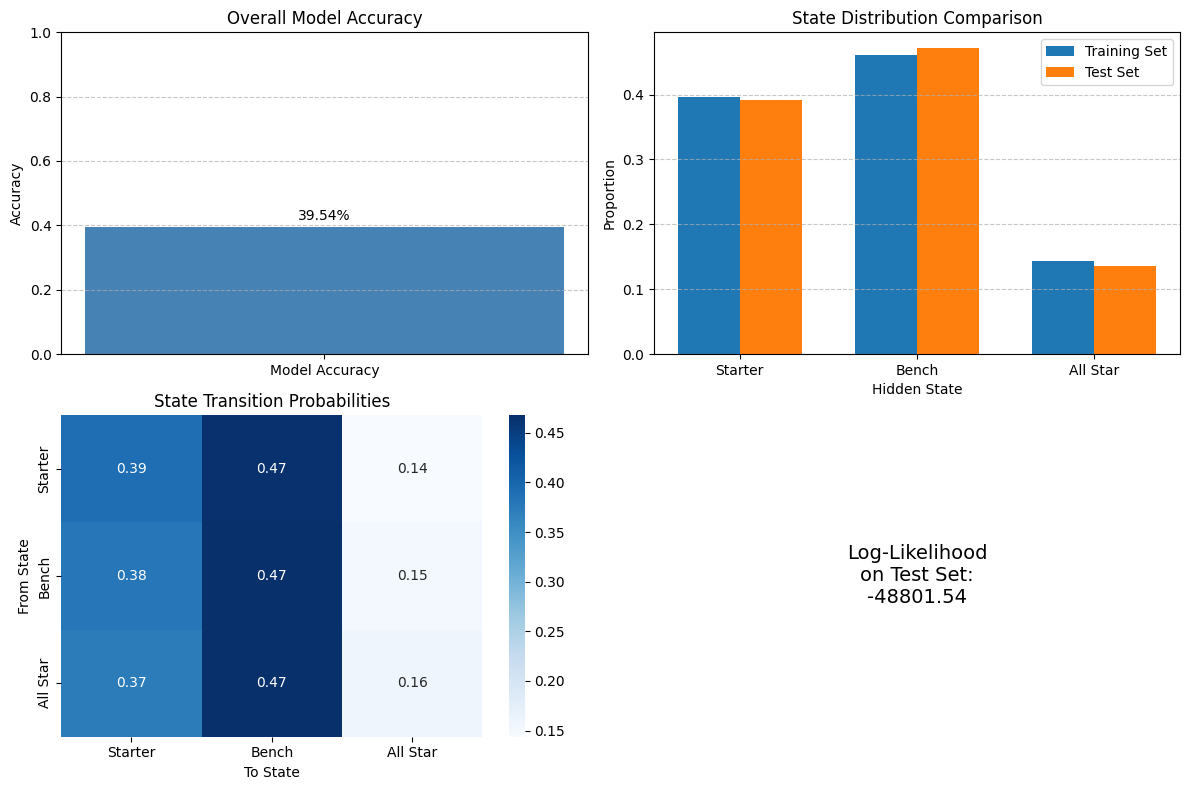

In [342]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(['Model Accuracy'], [accuracy], color='steelblue')
plt.title('Overall Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.text(0, accuracy + 0.02, f'{accuracy:.2%}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 2)
train_state_counts = pd.Series(train_predictions).value_counts(normalize=True).sort_index()
test_state_counts = pd.Series(test_predictions).value_counts(normalize=True).sort_index()

x = np.arange(len(state_mapping))
width = 0.35
plt.bar(x - width/2, train_state_counts, width, label='Training Set')
plt.bar(x + width/2, test_state_counts, width, label='Test Set')
plt.xlabel('Hidden State')
plt.ylabel('Proportion')
plt.title('State Distribution Comparison')
plt.xticks(x, [state_mapping[i] for i in range(3)])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 2, 3)
sns.heatmap(model.transmat_, annot=True, cmap='Blues', 
            xticklabels=[state_mapping[i] for i in range(3)],
            yticklabels=[state_mapping[i] for i in range(3)])
plt.title('State Transition Probabilities')
plt.xlabel('To State')
plt.ylabel('From State')

plt.subplot(2, 2, 4)
log_likelihood = model.score(X_test)
plt.text(0.5, 0.5, f'Log-Likelihood\non Test Set:\n{log_likelihood:.2f}', 
         ha='center', va='center', fontsize=14)
plt.axis('off')

plt.tight_layout()
plt.savefig("model_performance.png")
plt.show()

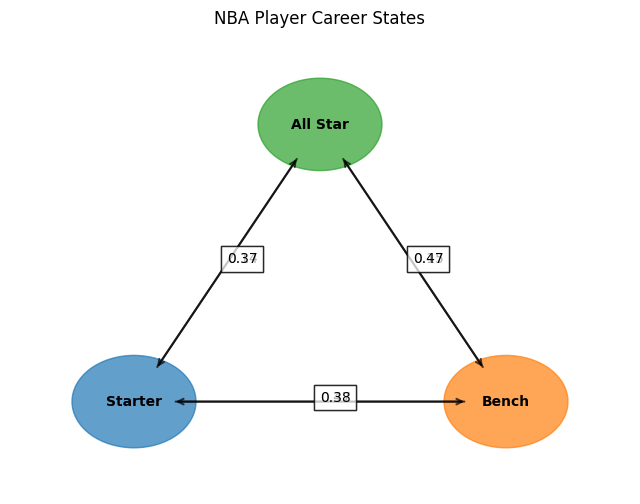

In [343]:
plt.figure(figsize=(8, 6))

positions = {0: [0.2, 0.2], 1: [0.8, 0.2], 2: [0.5, 0.8]}


for state, pos in positions.items():
    circle = plt.Circle(pos, 0.1, color=f'C{state}', alpha=0.7)
    plt.gca().add_patch(circle)
    plt.text(pos[0], pos[1], state_mapping[state], ha='center', va='center', fontweight='bold')

for i in range(3):
    for j in range(3):
        if model.transmat_[i, j] > 0.1: 
            start = positions[i]
            end = positions[j]

            if i != j:
                plt.annotate('', xy=end, xytext=start,
                          arrowprops=dict(arrowstyle='->', lw=1.5, alpha=0.7, shrinkA=30, shrinkB=30))
                plt.text((start[0] + end[0])/2, (start[1] + end[1])/2, 
                       f"{model.transmat_[i, j]:.2f}", bbox=dict(fc='white', alpha=0.7))

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('NBA Player Career States')
plt.axis('off')
plt.savefig('hmm_states.png')
plt.show()

In [344]:
long_career_players

['Eddie Johnson',
 'Mike Dunleavy',
 'Gerald Henderson',
 'Nazr Mohammed',
 'Kevin Willis',
 'Trevor Ariza',
 'Joe Smith',
 'Vince Carter',
 'George Johnson',
 'Andre Miller',
 'Juwan Howard',
 'James Edwards',
 'Ish Smith',
 'Mike James',
 'D.J. Augustin',
 'Jim Jackson',
 'Joe Johnson',
 'Tyrone Corbin',
 'Theo Ratliff',
 'Reggie Williams',
 'Kevin Garnett',
 'Chauncey Billups',
 'Drew Gooden',
 'Kyle Korver',
 'Charles Jones',
 'Corey Brewer',
 'Jason Kidd',
 'Kevin Ollie',
 'Charles Smith',
 'Rod Strickland',
 'Danny Schayes',
 'Sam Cassell',
 'Herb Williams',
 'Derek Fisher',
 'Jeff Green',
 'Tim Thomas',
 'Rajon Rondo',
 'Jamal Crawford',
 'Pau Gasol',
 'Avery Johnson',
 'Kenny Anderson',
 'Moses Malone',
 'Anthony Johnson',
 'Tyson Chandler',
 'Carmelo Anthony',
 'Devin Harris',
 'Metta World Peace',
 'Donyell Marshall',
 'Benoit Benjamin',
 'Mark Jackson',
 'Elden Campbell',
 'Otis Thorpe',
 'Chucky Brown',
 'Dirk Nowitzki',
 'Larry Hughes',
 'Dale Ellis',
 'Mark West',
 'Lou W

## Agent 

In [345]:
def classify_player_career_stage(player_stats):
    features_new = np.array([
        player_stats.get("Age", 0),
        player_stats.get("Games Played", 0),
        player_stats.get("Field Goal Percentage", 0),
        player_stats.get("Points_Per_Game", 0),
        player_stats.get("Assists_Per_Game", 0),
        player_stats.get("Points_Per_Game_Change", 0),
        player_stats.get("FG_Percentage_Change", 0),
        player_stats.get("Assists_Per_Game_Change", 0)
    ]).reshape(1, -1)
    
 
    features_new = np.nan_to_num(features_new)
    features_scaled_new = scaler.transform(features_new)
    predicted_state = model.predict(features_scaled_new)[0]

    return state_mapping[predicted_state]


In [346]:
example_player = {
    "Age": 28,
    "Games Played": 75,
    "Field Goal Percentage": 0.48,
    "Points_Per_Game": 22.5,
    "Assists_Per_Game": 5.2,
    "Points_Per_Game_Change": 1.5,
    "FG_Percentage_Change": 0.02,
    "Assists_Per_Game_Change": 0.3
}

In [347]:
predicted_stage = classify_player_career_stage(example_player)
print(f"\nPredicted career stage for example player: {predicted_stage}")


Predicted career stage for example player: Starter


In [348]:
def get_career_trajectory(current_state):
    trajectory = [current_state]
    current = current_state
    for _ in range(5):

        next_state = np.argmax(model.transmat_[current])
        trajectory.append(next_state)
        current = next_state
    trajectory_labels = [state_mapping[state] for state in trajectory]
    
    return trajectory_labels

In [350]:
example_trajectory = get_career_trajectory(state_labels.index("Starter"))
print(f"Most likely career trajectory starting from Starter stage: {example_trajectory}")

Most likely career trajectory starting from Starter stage: ['Starter', 'Bench', 'Bench', 'Bench', 'Bench', 'Bench']
